## Step1: Data Sourcing

**Import Required Libraries**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Load data
df =pd.read_csv('/Users/user/Downloads/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [41]:
df.shape

(1460, 81)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [43]:
# Cout of data types
df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [44]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step2: Data Cleansing

**MSSubClass**

As per data dictionary, the column `MSSubClass` has categorical values with interger data type. Therefore, change the datatype to object

In [45]:
# Change the data type from Integer to object
df['MSSubClass']=df['MSSubClass'].astype('object')

**Numerical columns with value 0**

There are few numerical columns with value 0 which can be replaced with null value

In [46]:
#List of columns with value 0
zero_cols=df.columns[df.eq(0).any()]
zero_cols

Index(['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [47]:
# Replace 0 with null value
df[zero_cols]=df[zero_cols].replace(0,np.NaN )

**Derive Age from YearBuilt**

In [48]:
df['Age']=2022-df['YearBuilt']
df[['YearBuilt','Age']].head()

,YearBuilt,Age
0,2003,19
1,1976,46
2,2001,21
3,1915,107
4,2000,22


## Step3: Missing Value Treatment

In [49]:
#Percentage of missing values
round((df[df.columns[df.isnull().any()]].isnull().sum()/len(df))*100,2).sort_values(ascending=False)

PoolQC           99.52
PoolArea         99.52
3SsnPorch        98.36
LowQualFinSF     98.22
MiscVal          96.44
MiscFeature      96.30
BsmtHalfBath     94.38
Alley            93.77
ScreenPorch      92.05
BsmtFinSF2       88.56
EnclosedPorch    85.75
Fence            80.75
HalfBath         62.53
MasVnrType       59.73
MasVnrArea       59.52
BsmtFullBath     58.63
2ndFlrSF         56.78
WoodDeckSF       52.12
FireplaceQu      47.26
Fireplaces       47.26
OpenPorchSF      44.93
BsmtFinSF1       31.99
LotFrontage      17.74
BsmtUnfSF         8.08
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        5.55
GarageArea        5.55
GarageQual        5.55
GarageCond        5.55
GarageType        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
TotalBsmtSF       2.53
BsmtFinType1      2.53
BsmtCond          2.53
FullBath          0.62
BedroomAbvGr      0.41
KitchenAbvGr      0.07
Electrical        0.07
dtype: float64

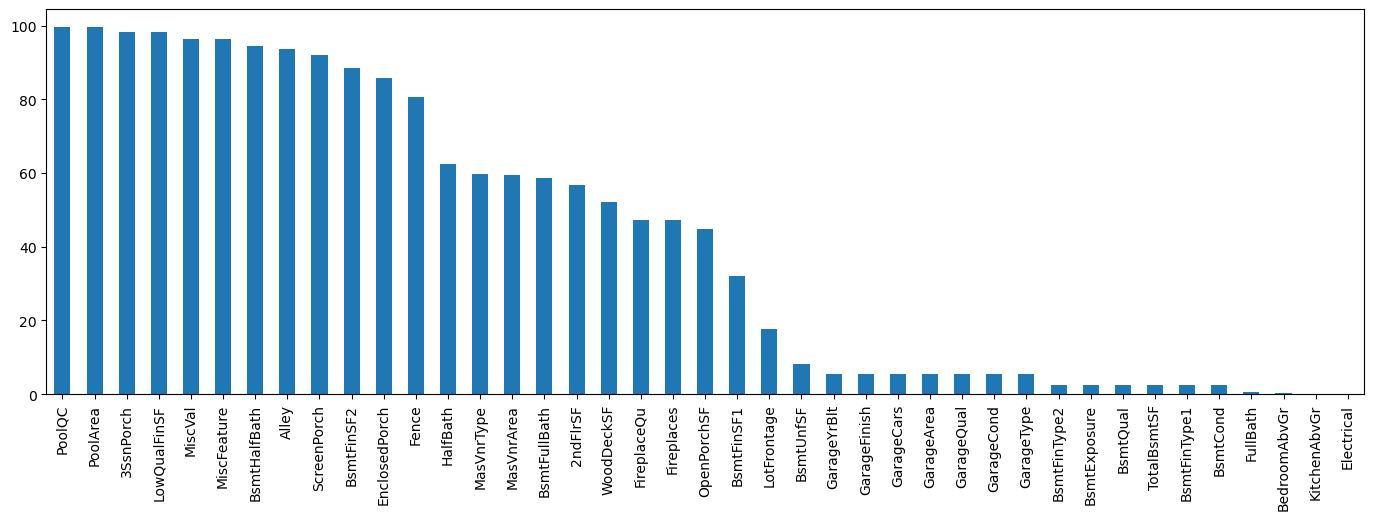

In [50]:
# Barplot for Percentages of missing values
plt.figure(figsize=[17,5])
round((df[df.columns[df.isnull().any()]].isnull().sum()/len(df))*100,2).sort_values(ascending=False).plot.bar()
plt.show()

**Observations:**
- There are few columns with missing values more than 30%. Therefore, drop null values by columns.
- `LotFrontage` null values can be imputed with median.
- `Garage` columns has same percentage of missing values. Therefore, drop null values by rows.
- `Basement` columns has same percentage of missing values. Therefore, drop null values by rows.
- `Masonry`  columns has same percentage of missing values. Therefore, drop null values by rows.

**Drop columns having missing values >30%**

In [51]:
# List of columns with missing values >30%
miss_cols=df.columns[(df.isnull().sum()/len(df)*100>30)]
miss_cols

Index(['Alley', 'MasVnrType', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
       'Fireplaces', 'FireplaceQu', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal'],
      dtype='object')

In [52]:
#Drop columns with missing values >40%
df.drop(miss_cols,axis=1, inplace=True)
df.shape

(1460, 60)

**LotFrontage**

In [53]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

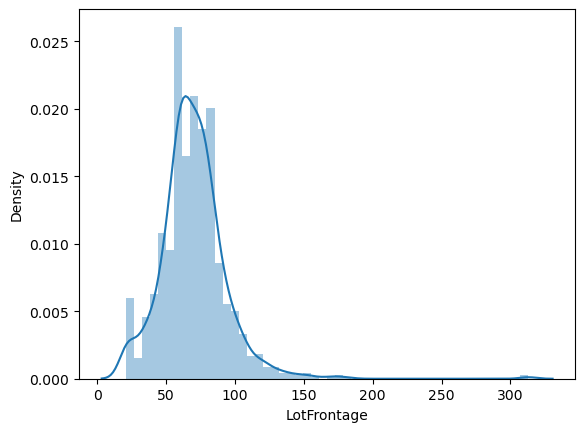

In [54]:
# Plot distribution
sns.distplot(df['LotFrontage'])
plt.show()

In [55]:
#Impute LotFrontage missing values with median
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

**Garage Columns**

In [56]:
garage_cols=['GarageYrBlt','GarageType','GarageFinish','GarageQual','GarageCond']
garage_cols

['GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [57]:
df[df['GarageYrBlt'].isnull()][garage_cols]

,GarageYrBlt,GarageType,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN
1407,NaN,NaN,NaN,NaN,NaN
1449,NaN,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN,NaN


In [58]:
# Drop null values by rows
df.dropna(subset=garage_cols, inplace=True)

In [59]:
df.shape

(1379, 60)

**Basement Columns**

In [60]:
df.columns[df.isnull().any()]

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'FullBath', 'BedroomAbvGr'],
      dtype='object')

In [61]:
basement_cols=['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2','BsmtUnfSF']
basement_cols

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtUnfSF']

In [62]:
# Drop null values by rows
df.dropna(subset=basement_cols, inplace=True)

In [63]:
df.shape

(1274, 60)

**Other columns**

In [64]:
other_cols=df.columns[df.isnull().any()]
other_cols

Index(['Electrical', 'FullBath', 'BedroomAbvGr'], dtype='object')

In [65]:
# Drop null values by rows
df.dropna(subset=other_cols, inplace=True)

In [66]:
df.shape

(1268, 60)

In [67]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [68]:
#Verify missing value treatment
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
GrLivArea        0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond  

## Step3: Data Visualization

**Categorical Variables**

In [69]:
# Create categorical variable list
cat_cols=df.select_dtypes('object').columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [70]:
len(cat_cols)

38

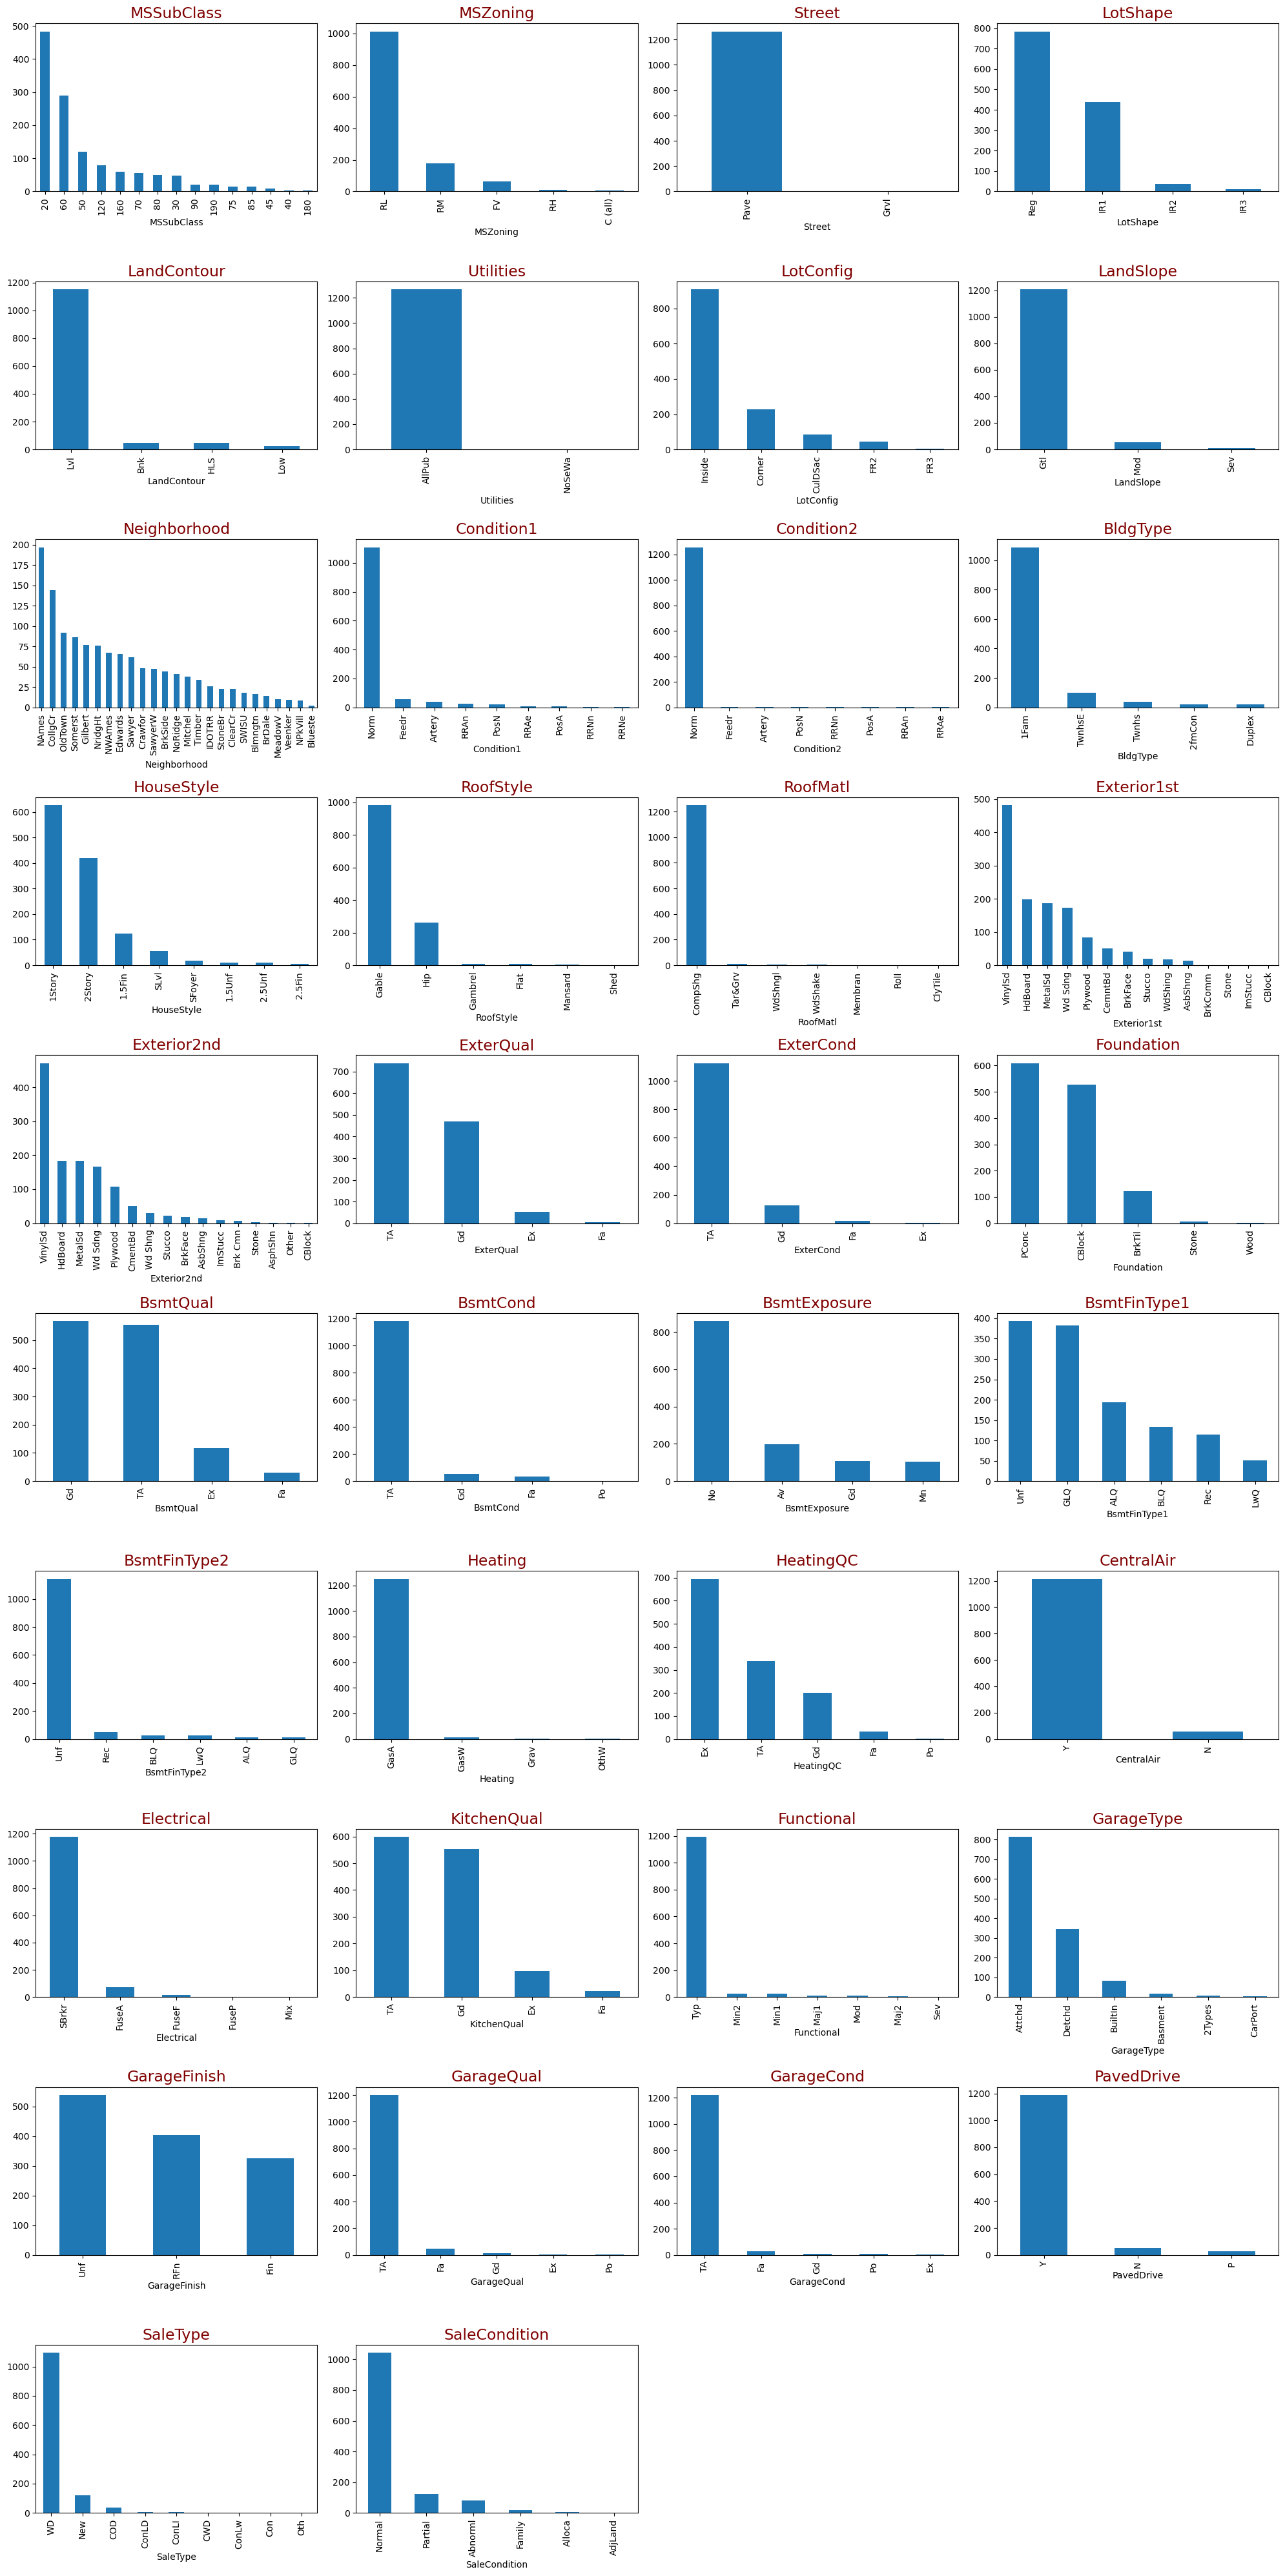

In [71]:
# Bar plot of all categorical variables by count
fig=plt.figure(figsize=[20,40])
for i,col in enumerate(cat_cols):
    plt.subplot(10,4,i+1)
    df[col].value_counts().plot.bar()
    plt.title(col,color='maroon', fontsize=17)
    fig.tight_layout()

**Numerical Variables**

In [72]:
#Create numerical variable list
num_cols=df.select_dtypes('number').columns
num_cols

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold',
       'SalePrice', 'Age'],
      dtype='object')

In [73]:
len(num_cols)

22

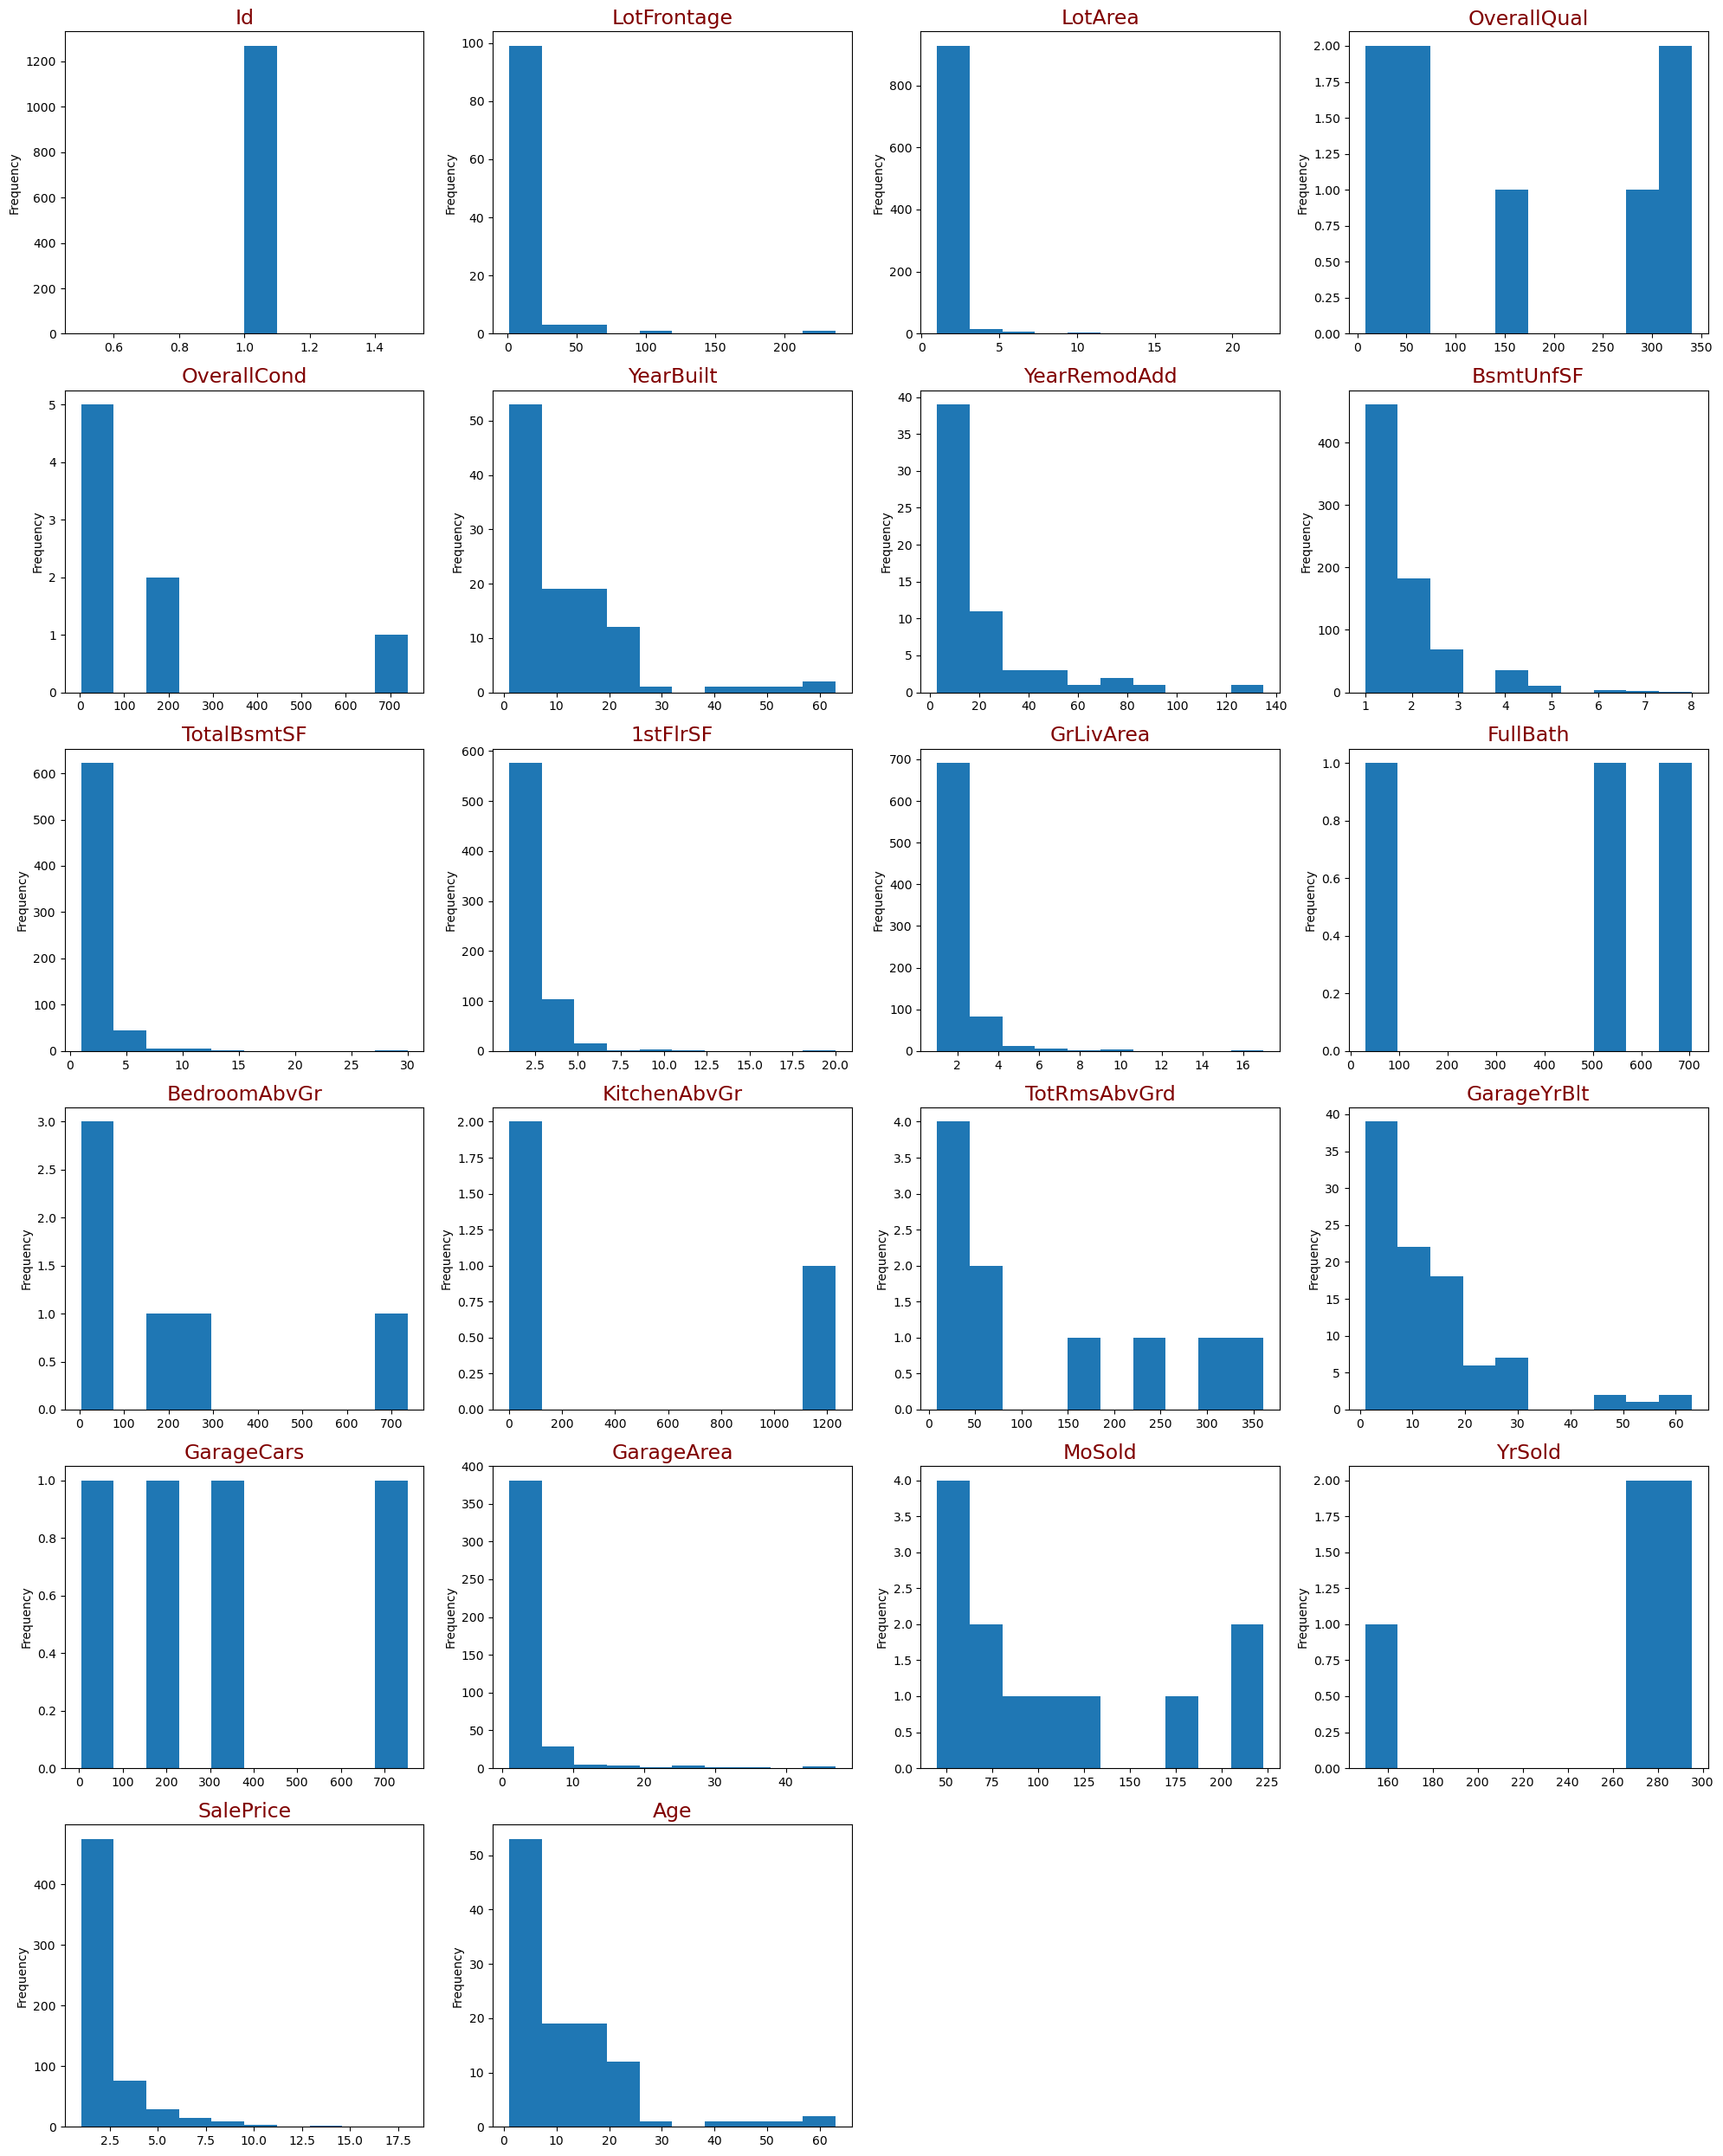

In [74]:
#Distribution of all numerical variables
fig=plt.figure(figsize=[20,25])
for i,col in enumerate(num_cols):
    plt.subplot(6,4,i+1)
    df[col].value_counts().plot.hist()
    plt.title(col,color='maroon', fontsize=17)
    fig.tight_layout()

**Correlation Matrix of numerical variables**

In [75]:
df[num_cols].corr()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice,Age
Id,1.000000,-0.007387,-0.031197,-0.030904,0.011756,-0.017997,-0.023860,-0.012645,-0.013413,0.015107,...,0.037468,0.013937,0.018152,0.004912,0.022628,0.031307,0.032579,0.000589,-0.022057,0.017997
LotFrontage,-0.007387,1.000000,0.294381,0.230099,-0.048748,0.107314,0.082020,0.100298,0.383800,0.417937,...,0.242305,0.010904,0.324293,0.065316,0.267469,0.335442,0.021878,0.008331,0.332403,-0.107314
LotArea,-0.031197,0.294381,1.000000,0.083340,0.001027,-0.007602,0.003212,-0.014439,0.266328,0.291028,...,0.137449,-0.001827,0.192800,-0.027611,0.131804,0.161000,-0.000097,-0.007145,0.247152,0.007602
OverallQual,-0.030904,0.230099,0.083340,1.000000,-0.175964,0.575357,0.548218,0.277406,0.498962,0.474106,...,0.066741,-0.136461,0.437987,0.547620,0.595110,0.537458,0.069060,-0.017580,0.782506,-0.575357
OverallCond,0.011756,-0.048748,0.001027,-0.175964,1.000000,-0.419941,0.026341,-0.165816,-0.232889,-0.153610,...,0.014080,-0.072345,-0.070033,-0.341706,-0.258391,-0.211721,-0.003652,0.057449,-0.114101,0.419941
YearBuilt,-0.017997,0.107314,-0.007602,0.575357,-0.419941,1.000000,0.621827,0.135175,0.379091,0.256489,...,-0.086878,-0.190791,0.098135,0.828264,0.524317,0.444013,0.003579,-0.000274,0.502922,-1.000000
YearRemodAdd,-0.023860,0.082020,0.003212,0.548218,0.026341,0.621827,1.000000,0.146507,0.254127,0.237489,...,-0.086607,-0.163198,0.170522,0.642148,0.459328,0.389217,0.020009,0.033937,0.500096,-0.621827
BsmtUnfSF,-0.012645,0.100298,-0.014439,0.277406,-0.165816,0.135175,0.146507,1.000000,0.365667,0.334421,...,0.128297,0.095555,0.216954,0.167279,0.236948,0.203570,0.029640,-0.050221,0.175446,-0.135175
TotalBsmtSF,-0.013413,0.383800,0.266328,0.498962,-0.232889,0.379091,0.254127,0.365667,1.000000,0.902426,...,0.030591,0.044454,0.295552,0.314161,0.452873,0.511889,-0.000630,-0.011711,0.595104,-0.379091
1stFlrSF,0.015107,0.417937,0.291028,0.474106,-0.153610,0.256489,0.237489,0.334421,0.902426,1.000000,...,0.103852,0.075650,0.387661,0.233217,0.440574,0.500717,0.030220,-0.011458,0.598811,-0.256489


**Heatmap of numerical variables correlation**

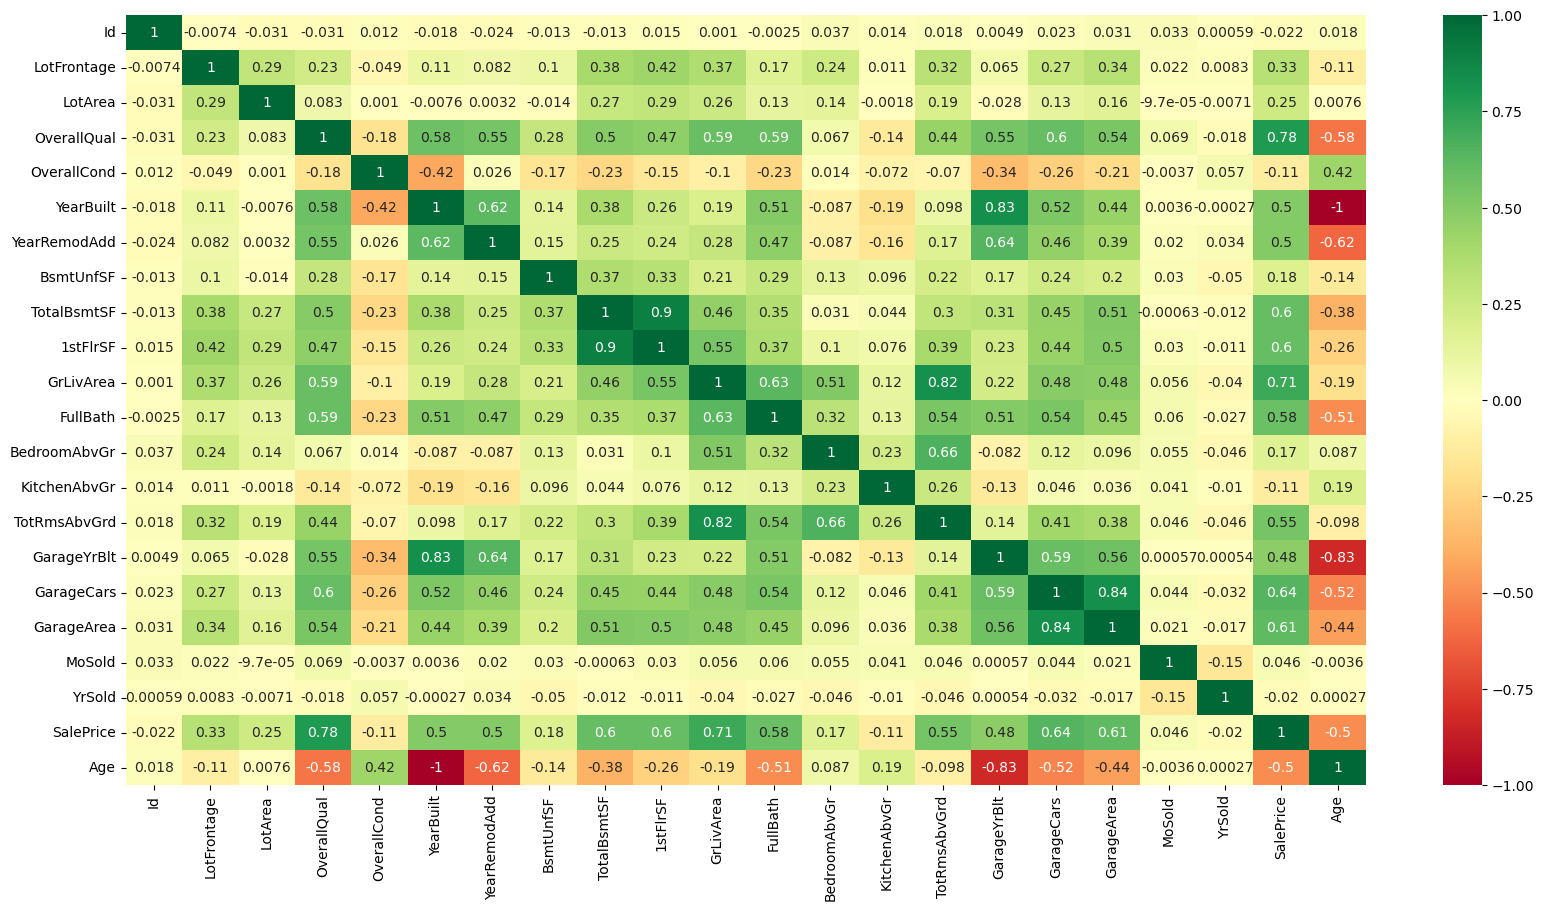

In [76]:
plt.figure(figsize=[20,10])
sns.heatmap(df[num_cols].corr(), annot=True, cmap='RdYlGn')
plt.show()

**Observation: Following pairs are highly correlated**
- GarageArea and GarageCars
- TotRmsAbvGr and GrLiveArea
- SalesPrice and OverallQual
- SalesPrice and GrLiveArea

## Step4: Data Preparation

### Categorical Variables

**Drop Date, Year and Month columns as dataset may suffer high dimensionality problem if we create dummies of these columns**

In [77]:
date_cols=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold']
date_cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold']

In [78]:
# Drop year and month columns
df.drop(date_cols,axis=1, inplace=True)
df.shape

(1268, 55)

**Create dummies for categorical variables**

In [79]:
#Create a list of categorical variables
cat_cols=df.select_dtypes('object').columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [80]:
# New dataframe of dummies
df_dum=pd.get_dummies(df[cat_cols],drop_first=True)

In [81]:
df_dum.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [82]:
df_dum.shape

(1268, 201)

**Concatenate dummies  data frame with original data frame**

In [83]:
df=pd.concat([df,df_dum], axis=1)
df.shape

(1268, 256)

In [84]:
# Drop original columns of categorical variables
df.drop(cat_cols, axis=1, inplace=True)
df.shape

(1268, 218)

In [85]:
# Drop id column as it is not a significant predictor
df.drop('Id', axis=1, inplace=True)
df.shape

(1268, 217)

### Split data frame into train and test sets

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
#Split train and test sets in 70:30 ratio
df_train, df_test=train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [88]:
#Verify train, test size
print('Train shape', df_train.shape)
print('Test shape', df_test.shape)

Train shape (887, 217)
Test shape (381, 217)


### Rescaling Numerical Variables

In [89]:
#Create numerical variables list
num_cols=df.select_dtypes(exclude='uint8').columns
num_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=217)

**Rescale using MinMaxScaler**

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler=MinMaxScaler()

In [92]:
# Fit and transform scaler on train set
# Transform scaler on test set
df_train[num_cols]=scaler.fit_transform(df_train[num_cols])
df_test[num_cols]=scaler.transform(df_test[num_cols])

In [93]:
#Verify train set scaled variables
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
919,0.226027,0.058253,0.428571,0.857143,0.099483,0.348627,0.339162,0.203848,0.0,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1210,0.167808,0.059411,0.428571,0.428571,0.448320,0.306947,0.208379,0.315913,0.5,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
487,0.167808,0.065694,0.285714,0.571429,0.203273,0.445557,0.364663,0.222049,0.5,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1302,0.243151,0.052681,0.714286,0.428571,0.177003,0.342488,0.262295,0.492980,0.5,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
171,0.410959,0.185394,0.428571,0.428571,0.183893,0.315024,0.427322,0.266771,0.0,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [94]:
#Verify test set scaled variables
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
842,0.208904,0.045938,0.428571,0.714286,0.112834,0.330210,0.248452,0.139106,0.0,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
465,0.164384,0.009477,0.571429,0.428571,0.586133,0.410339,0.339162,0.203848,0.5,0.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
118,0.236301,0.066510,0.571429,0.428571,0.081395,0.506624,0.442987,0.673947,1.0,0.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
724,0.222603,0.072088,0.857143,0.428571,0.193798,0.514701,0.442623,0.277691,0.5,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
116,0.164384,0.061851,0.285714,0.428571,0.102498,0.318901,0.221858,0.120125,0.0,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Divide train set into X and Y sets

In [95]:
#Create train set SalePrice as target(y) variable and rest of them as predictor(x) variables
y_train=df_train.pop('SalePrice')
x_train=df_train

In [96]:
print('y_train shape', y_train.shape)
print('x_train shape', x_train.shape)

y_train shape (887,)
x_train shape (887, 216)


In [97]:
#Create test set SalePrice as target(y) variable and rest of them as predictor(x) variables
y_test=df_test.pop('SalePrice')
x_test=df_test

In [98]:
print('y_test shape', y_test.shape)
print('x_test shape', x_test.shape)

y_test shape (381,)
x_test shape (381, 216)


## Step5: Model Building and Evaluation

### Model using Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [100]:
# Build Linear Regression model
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [101]:
# Print the coefficients and intercept
print(lr.intercept_)
print(lr.coef_)

-470185739755.88324
[ 4.27725422e-02  2.37838552e-01  6.46627308e-02  6.48103086e-02
 -7.70721212e-02  2.31917890e-01 -1.76185211e-01  5.81774698e-01
  3.40216597e-03 -4.64840635e-02 -6.96317492e-02 -5.90363547e-04
  2.56793371e-02  1.68155681e-02 -7.49607747e-02  2.49037789e-03
 -1.52702100e-02 -1.42732731e+11  1.33388432e-02  7.83942363e-03
  1.38984128e-02  4.68476847e-02  5.23393240e-03 -6.16201422e-02
  1.69612177e+11 -1.69599502e-02  5.02652133e-03 -8.97095358e-02
  6.14752656e-02  7.12519335e-02  6.82646922e-02  5.88582840e-02
  5.29814156e-02  7.16724396e-02  3.98635864e-03 -1.15795135e-02
 -6.71386719e-04  9.09996033e-03 -4.90150452e-02 -8.50677490e-04
  2.31139840e+10  1.28078461e-02 -7.82680511e-03 -2.64911652e-02
  1.27029419e-03  1.49583817e-02 -8.55998993e-02  1.19402409e-02
 -9.34481621e-03  1.03673935e-02 -1.50208473e-02 -1.22337341e-02
  8.20159912e-04 -1.93557739e-02 -1.18665695e-02 -1.21307373e-03
 -1.66702271e-03 -3.02772522e-02 -2.17399597e-02  5.40485382e-02
 -2.5

**Linear Model Evaluation on train set**

In [102]:
#Predict using Linear Regression on train set
y_train_pred=lr.predict(x_train)

In [103]:
# R-Square value of train set
r2_score(y_train,y_train_pred)

0.931331834516212

In [104]:
# MSR value on train set
mean_squared_error(y_train,y_train_pred)

0.0009345065146045724

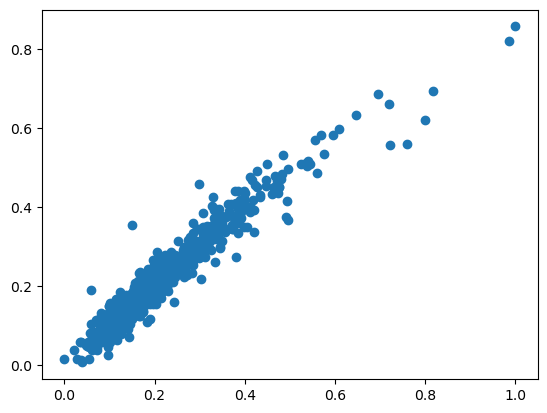

In [105]:
#Scatter plot of actual and train set predictions using Linear Regression
plt.scatter(y_train,y_train_pred)
plt.show()

**Linear Model Evaluation on test set**

In [106]:
#Predict using Linear Regression
y_test_pred=lr.predict(x_test)

In [107]:
# R-Square value of test set
r2_score(y_test,y_test_pred)

-6.061217985689941e+22

In [108]:
# MSR value on test set
mean_squared_error(y_test,y_test_pred)

5.8722400808651496e+20

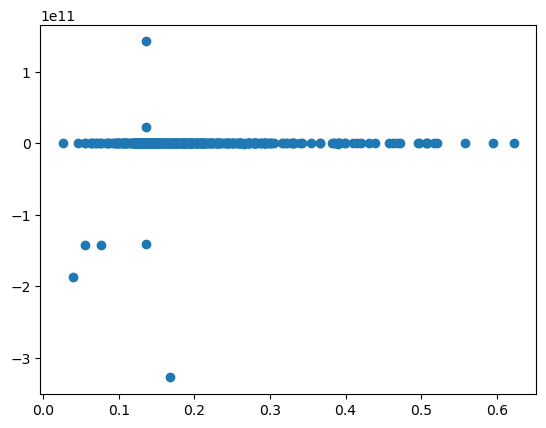

In [109]:
#Scatter plot of actual and test set predictions using Linear Regression
plt.scatter(y_test,y_test_pred)
plt.show()

**Observation:**
- R-Square value of train set is 0.93
- R-Square value of train set is -4.7
- Therefore, model is clearly overfitting

### Model using Ridge Regression

In [110]:
from sklearn.linear_model import Ridge

In [111]:
#List of lambda values for iteration
lambdas=[0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [112]:
# Iterate Ridge model to find optimum lambda value
for lam in lambdas:
    ridge=Ridge(alpha=lam)
    ridge.fit(x_train, y_train)
    y_train_pred=ridge.predict(x_train)
    print(lam,'------',r2_score(y_train, y_train_pred))

0 ------ 0.9357798500043536
0.001 ------ 0.9376738732457292
0.01 ------ 0.9376412796711037
0.1 ------ 0.9366113782224799
1 ------ 0.928036973587683
10 ------ 0.8993609785005681
100 ------ 0.7874497938069739
1000 ------ 0.49243310324828504


**Observation:** Optimal lambda value using Ridge regression is 0.001 

In [113]:
# Build final Ridge model using lambda=0.001
ridge=Ridge(alpha=0.001)
ridge.fit(x_train, y_train)

Ridge(alpha=0.001)

In [114]:
# Print the coefficients and intercept
print(ridge.intercept_)
print(ridge.coef_)

-0.09299683400640046
[ 4.28147021e-02  2.41300982e-01  5.32851822e-02  7.23346279e-02
 -7.62401762e-02  2.33213408e-01 -1.57563500e-01  5.55666875e-01
  9.52444911e-03 -5.27065686e-02 -5.54105480e-02  5.10618053e-03
  1.44543950e-02  1.23082324e-02 -7.09362848e-02  2.25057215e-04
 -2.67248078e-02 -2.62975961e-02  1.10038484e-02  1.55765491e-02
  1.54331477e-02  1.50207869e-02  7.89748014e-03 -7.23058681e-02
 -1.26203503e-02 -1.40547874e-02  1.05916961e-03 -9.50189382e-02
  2.32843377e-02  5.93001884e-02  5.45745033e-02  4.77868611e-02
  3.54216083e-02  6.79059405e-02  6.70856765e-03 -1.29830609e-02
  1.57155708e-04  6.92430467e-03 -4.75167537e-02 -2.90462282e-03
  0.00000000e+00  8.62503688e-03 -1.16704542e-02 -3.16236873e-02
 -1.09358317e-03  3.84022485e-03 -9.03088195e-02  3.29945989e-02
  2.13561461e-02  7.54367243e-03 -1.61779280e-02 -1.45132036e-02
  1.56236100e-02 -2.24645271e-02 -1.49363239e-02  6.98151804e-03
  1.19233965e-02 -2.07715848e-02 -1.91454181e-02  3.98054011e-02
 -2.

**Ridge Model Evaluation on train set**

In [115]:
#Predict using Ridge Regression on train set
y_train_pred=ridge.predict(x_train)

In [116]:
#R-Square value of train set
r2_score(y_train, y_train_pred)

0.9376738732457292

In [117]:
#MSR value of train set
mean_squared_error(y_train, y_train_pred)

0.0008481975755663288

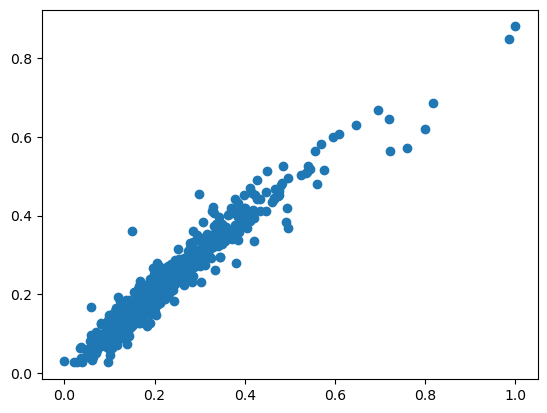

In [118]:
#Scatter plot of actual and train set predictions using Ridge Regression
plt.scatter(y_train, y_train_pred)
plt.show()

**Ridge Model Evaluation on test set**

In [119]:
#Predict using Ridge Regression on test set
y_test_pred=ridge.predict(x_test)

In [120]:
#R-Square value on test set
r2_score(y_test, y_test_pred)

0.44453591268355197

In [121]:
#MSR value on test set
mean_squared_error(y_test, y_test_pred)

0.005381457134064015

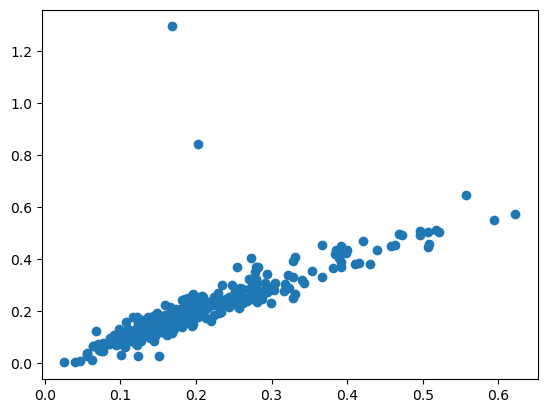

In [122]:
#Scatter plot of actual and test set predictions using Ridge Regression
plt.scatter(y_test, y_test_pred)
plt.show()

**Observation:** 
- R-Square value of train set is 0.93
- R-Square value of train set is 0.87
- Therefore, it is a good model

### Model using Lasso Regression

In [123]:
from sklearn.linear_model import Lasso

In [124]:
# Iterate Lasso model to find optimum lambda value
for lam in lambdas:
    lasso=Lasso(alpha=lam)
    lasso.fit(x_train, y_train)
    y_train_pred=lasso.predict(x_train)
    print(lam,'------',r2_score(y_train, y_train_pred))

0 ------ 0.9376736829214575
0.001 ------ 0.8633105113136388
0.01 ------ 0.41583186793836047
0.1 ------ 0.0
1 ------ 0.0
10 ------ 0.0
100 ------ 0.0
1000 ------ 0.0


**Observation:** 
- Model has high R-Square at lambda=0. 
- But Lasso cannot do feature selection at lambda=0 as penalty term becomes zero.
- Therefore choose lambda=0.001 with decent R-Square value that can help us in feature selection by shrinking insignificant coefficients to 0. 

In [125]:
# Build final Lasso model using lambda=0.001
lasso=Lasso(alpha=0.001)
lasso.fit(x_train, y_train)

Lasso(alpha=0.001)

In [126]:
# Print the coefficients and intercept
print(lasso.intercept_)
print(lasso.coef_)

0.07125325484639311
[ 0.          0.          0.14396152  0.0182577  -0.          0.08843669
  0.          0.28788295  0.         -0.         -0.          0.
  0.01952964  0.00703855 -0.         -0.         -0.         -0.
 -0.          0.00508328 -0.         -0.         -0.          0.
 -0.         -0.         -0.          0.         -0.          0.
 -0.          0.00852518 -0.00349386  0.          0.         -0.
 -0.00915971  0.         -0.         -0.          0.          0.
 -0.         -0.         -0.          0.         -0.          0.
 -0.          0.          0.         -0.          0.00035925 -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.01719973  0.00975243 -0.         -0.          0.
 -0.          0.          0.00534608 -0.          0.         -0.
  0.00216964 -0.          0.         -0.         -0.         -0.
  0.         -0.          0.          0.         -0.         -0.
  0.          0.         -0.         -0.         -0.         -

**Lasso Model Evaluation on train set**

In [127]:
#Predict using Lasso Regression on train set
y_train_pred=lasso.predict(x_train)

In [128]:
#R_Square value of train set
r2_score(y_train, y_train_pred)

0.8633105113136388

In [129]:
##MSR value of train set
mean_squared_error(y_test, y_test_pred)

0.005381457134064015

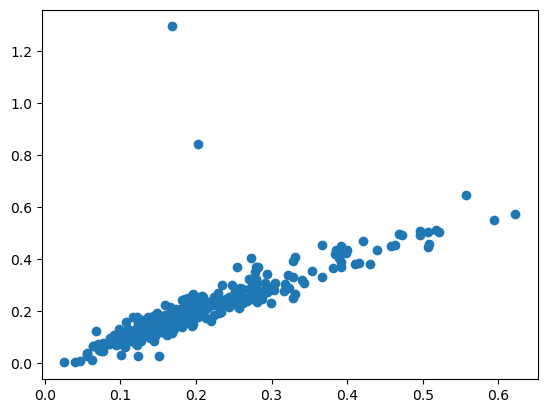

In [130]:
#Scatter plot of actual and train set predictions using Lasso Regression
plt.scatter(y_test, y_test_pred)
plt.show()

**Lasso Model Evaluation on test set**

In [131]:
#Predict using Lasso Regression on test set
y_test_pred=lasso.predict(x_test)

In [132]:
#R_Square value of test set
r2_score(y_test, y_test_pred)

0.6533747340066731

In [133]:
#MSR value of test set
mean_squared_error(y_test, y_test_pred)

0.003358181119392398

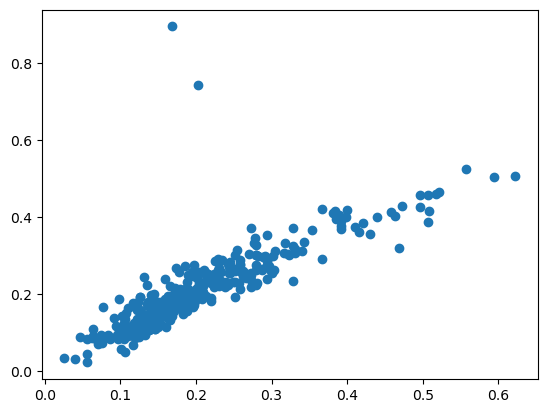

In [134]:
#Scatter plot of actual and test set predictions using Lasso Regression
plt.scatter(y_test, y_test_pred)
plt.show()

**Observation:** 
- R-Square value of train set is 0.81
- R-Square value of train set is 0.77
- Therefore, it is a good model

### Feature selection using Lasso

In [135]:
# List of Non-Zero coefficients
lasso.coef_[lasso.coef_>0]

array([0.14396152, 0.0182577 , 0.08843669, 0.28788295, 0.01952964,
       0.00703855, 0.00508328, 0.00852518, 0.00035925, 0.01719973,
       0.00975243, 0.00534608, 0.00216964, 0.00909196, 0.00778985,
       0.00084621, 0.03028579, 0.0085351 , 0.00307167, 0.00530416,
       0.00068834, 0.03298104])

In [136]:
# Lasso model selected 19 out of 219 variables
len(lasso.coef_[lasso.coef_>0])

22

In [137]:
# List of significant variables selected by Lasso model
df_train.columns[lasso.coef_>0]

Index(['OverallQual', 'OverallCond', 'TotalBsmtSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'MSSubClass_60', 'MSZoning_RL', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'RoofStyle_Hip', 'Foundation_PConc', 'BsmtCond_TA',
       'BsmtExposure_Gd', 'BsmtFinType1_GLQ', 'CentralAir_Y', 'Functional_Typ',
       'GarageType_BuiltIn', 'SaleType_New'],
      dtype='object')

## Step6: Conclusion after Regularization

- Linear regression suffered with overfitting problem.
- Ridge regression gave good performance but suffered with high dimensionality problem.
- Lasso regression gave decent performance but efficiently addressed high dimensionality problem.

In [138]:
#Create dataframe with coefficients
betas = pd.DataFrame(index=df_train.columns)

In [139]:
betas['Linear'] = lr.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [140]:
pd.set_option('display.max_rows', None)
betas

,Linear,Ridge,Lasso
LotFrontage,4.277254e-02,0.042815,0.000000
LotArea,2.378386e-01,0.241301,0.000000
OverallQual,6.466273e-02,0.053285,0.143962
OverallCond,6.481031e-02,0.072335,0.018258
BsmtUnfSF,-7.707212e-02,-0.076240,-0.000000
TotalBsmtSF,2.319179e-01,0.233213,0.088437
1stFlrSF,-1.761852e-01,-0.157563,0.000000
GrLivArea,5.817747e-01,0.555667,0.287883
FullBath,3.402166e-03,0.009524,0.000000
BedroomAbvGr,-4.648406e-02,-0.052707,-0.000000


**End of the Assignment**

## Subjective Questions Excercise

### Question-1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### Answer

In [141]:
# Build final Ridge model using double of lambda=0.002
ridge=Ridge(alpha=0.002)
ridge.fit(x_train, y_train)

Ridge(alpha=0.002)

In [142]:
#Predict using Ridge Regression on test set
y_test_pred=ridge.predict(x_test)

In [143]:
#R-Square value on test set
r2_score(y_test, y_test_pred)

0.44518649167731106

**Observation:** There is a slight reduction in R-Square value. 

In [144]:
# Build final Lasso model using double of lambda=0.002
lasso=Lasso(alpha=0.002)
lasso.fit(x_train, y_train)

Lasso(alpha=0.002)

In [145]:
#Predict using Ridge Regression on test set
y_test_pred=lasso.predict(x_test)

In [146]:
#R-Square value on test set
r2_score(y_test, y_test_pred)

0.6904904400051111

In [147]:
# Lasso model selected 13 out of 219 variables
len(lasso.coef_[lasso.coef_>0])

12

In [148]:
# List of significant variables selected by Lasso model
df_train.columns[lasso.coef_>0]

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'MSZoning_RL', 'Neighborhood_NridgHt', 'RoofStyle_Hip',
       'Foundation_PConc', 'BsmtExposure_Gd', 'BsmtFinType1_GLQ',
       'SaleType_New'],
      dtype='object')

**Observation:** 
- There is a slight reduction in R-Square value. 
- Also, there is a reduction in selected features

### Question-2


You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?


### Answer:

I would choose the lasso model the resoons behind for choosing Lasso model Model is gives apropriate performance.
Simpler model and easy for maintenance.


### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

### Answer:

In [149]:
betas.sort_values('Lasso', ascending=False).head(10)

,Linear,Ridge,Lasso
GrLivArea,0.581775,0.555667,0.287883
OverallQual,0.064663,0.053285,0.143962
TotalBsmtSF,0.231918,0.233213,0.088437
SaleType_New,0.014061,0.040023,0.032981
BsmtExposure_Gd,0.023708,0.022168,0.030286
GarageCars,0.025679,0.014454,0.019530
OverallCond,0.064810,0.072335,0.018258
Neighborhood_NoRidge,0.002350,0.014301,0.017200
Neighborhood_NridgHt,0.018341,0.011937,0.009752
RoofStyle_Hip,0.045883,0.012058,0.009092


In [150]:
betas.sort_values('Lasso', ascending=False).iloc[5:10]

,Linear,Ridge,Lasso
GarageCars,0.025679,0.014454,0.019530
OverallCond,0.064810,0.072335,0.018258
Neighborhood_NoRidge,0.002350,0.014301,0.017200
Neighborhood_NridgHt,0.018341,0.011937,0.009752
RoofStyle_Hip,0.045883,0.012058,0.009092


In [151]:
betas.sort_values('Lasso', ascending=False).iloc[5:10].index

Index(['GarageCars', 'OverallCond', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'RoofStyle_Hip'],
      dtype='object')

In [152]:
betas.sort_values('Lasso', ascending=False).iloc[0:5].index

Index(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'SaleType_New',
       'BsmtExposure_Gd'],
      dtype='object')

In [153]:
# Sort coefficients by absolute value to identify the most important predictor variables
lasso_coefficients = betas['Lasso'].abs().sort_values(ascending=False)

# Extract the top five predictor variables
top_five_predictors = lasso_coefficients.head(5)

# Display the names of the top five predictor variables
top_five_predictor_names = top_five_predictors.index
print("Top five predictor variables in the Lasso model:")
print(top_five_predictor_names)


Top five predictor variables in the Lasso model:
Index(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'SaleType_New',
       'BsmtQual_Gd'],
      dtype='object')


Now that we have identified the top five predictor variables in the Lasso model, we can exclude them from the incoming data and create another model. Let's call this updated model "Lasso_excluded".


In [154]:
# Exclude the top five predictor variables from the incoming data
incoming_data_excluded = df.drop(top_five_predictor_names, axis=1)

# Split the updated data into train and test sets
x_train_excluded, x_test_excluded = train_test_split(incoming_data_excluded, train_size=0.7, test_size=0.3, random_state=100)

# Build the Lasso model with the updated data
lasso_excluded = Lasso(alpha=0.001)
lasso_excluded.fit(x_train_excluded, y_train)

# Predict using the Lasso model on the test set
y_test_pred_excluded = lasso_excluded.predict(x_test_excluded)

# Evaluate the performance of the Lasso model with excluded variables
r2_score_excluded = r2_score(y_test, y_test_pred_excluded)
mse_excluded = mean_squared_error(y_test, y_test_pred_excluded)

print("R-Square value of the Lasso model with excluded variables:", r2_score_excluded)
print("Mean squared error of the Lasso model with excluded variables:", mse_excluded)


R-Square value of the Lasso model with excluded variables: 0.9999999999999893
Mean squared error of the Lasso model with excluded variables: 1.0333158445991668e-16


This approach ensures that we adapt the model to the available data while maintaining performance by excluding variables that are not present in the incoming data.